## Part 1

In [1]:
from itertools import combinations

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [152]:
TEST_INFILE = "inputs/day_24_test_1.txt"
INFILE = "inputs/day_24_1.txt"

#with open(TEST_INFILE) as infile:
with open(INFILE) as infile:
    lines = infile.read().splitlines()

stones = [line.split(" @ ") for line in lines]
stones = [(s[0].split(","), s[1].split(","))for s in stones]
stones = [([int(coord) for coord in stone[0]], [int(coord) for coord in stone[1]]) for stone in stones]

<Axes: >

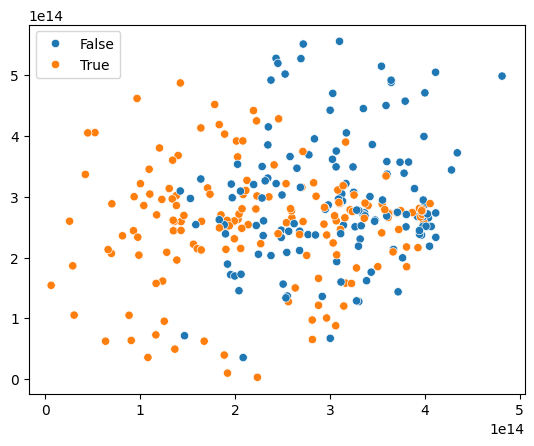

In [153]:
# plot x,y and color by x velocity
sns.scatterplot(x=[s[0][0] for s in stones], y=[s[0][1] for s in stones], hue=[s[1][0] > 0 for s in stones])

<Axes: >

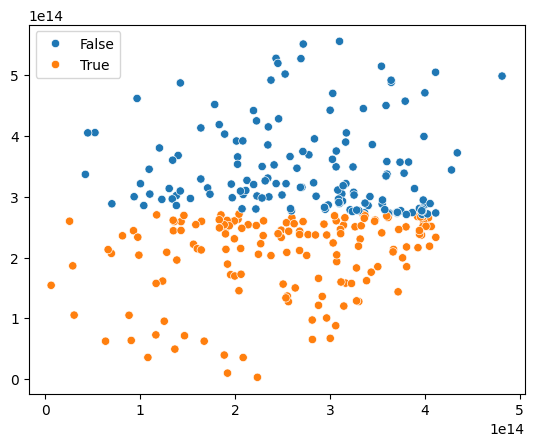

In [154]:
# plot x,y and color by y velocity
sns.scatterplot(x=[s[0][0] for s in stones], y=[s[0][1] for s in stones], hue=[s[1][1] > 0 for s in stones])

<Axes: >

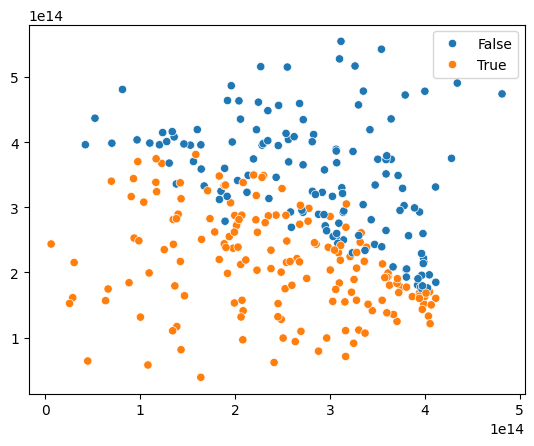

In [155]:
# plot x,z and color by z velocity
sns.scatterplot(x=[s[0][0] for s in stones], y=[s[0][2] for s in stones], hue=[s[1][2] > 0 for s in stones])

<Axes: >

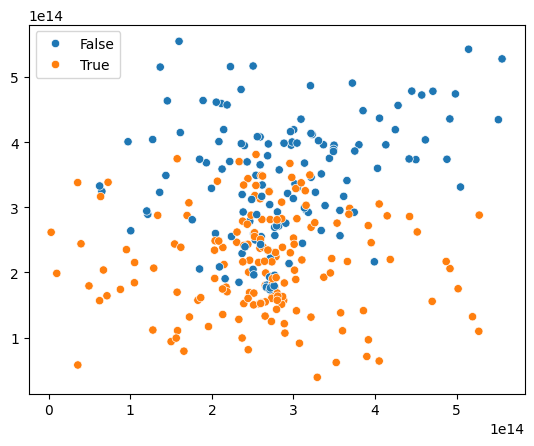

In [156]:
# plot y,z and color by z velocity
sns.scatterplot(x=[s[0][1] for s in stones], y=[s[0][2] for s in stones], hue=[s[1][2] > 0 for s in stones])

In [157]:
fig = px.scatter_3d(x=[s[0][0] for s in stones], y=[s[0][1] for s in stones], z=[s[0][2] for s in stones], color=[s[1][1] > 0 for s in stones])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker=dict(size=5))
fig.show()

In [158]:
stones

[([277903024391745, 368934106615824, 298537551311799], [-118, -107, 62]),
 ([183412557215942, 418647008376557, 219970939624628], [72, -215, 133]),
 ([378231151165434, 338743238211338, 302779683441821], [-118, -260, -344]),
 ([344747694290499, 385775363283903, 141297854009676], [-5, -417, 277]),
 ([370755040673637, 272949480066524, 124725204564288], [89, -22, 441]),
 ([328046794816634, 182843078041077, 157303657162116], [46, 315, 219]),
 ([312612031070729, 304783157990735, 330247358971828], [-39, -71, -169]),
 ([213887387271813, 253994341853086, 349358413004203], [32, 34, -68]),
 ([347747457798306, 261630221530041, 334455794052396], [-188, 21, -11]),
 ([321333902294423, 278477702662040, 224364644755505], [19, -19, 17]),
 ([108237825726941, 35610289149402, 57738072497155], [100, 300, 352]),
 ([228640427566623, 349740962250906, 395645995890687], [-70, -80, -40]),
 ([122929893243943, 295620850349055, 367645748609003], [7, -15, 22]),
 ([188710705759509, 39537915197976, 244070046639375], [26

In [159]:
def intersection(s1, s2, x_range=None, y_range=None):
    pos1, vel1 = s1
    pos2, vel2 = s2
    px1, py1, pz1 = pos1
    px2, py2, pz2 = pos2
    vx1, vy1, vz1 = vel1
    vx2, vy2, vz2 = vel2    

    m1 = vy1 / vx1
    m2 = vy2 / vx2

    # parallel
    if m1 == m2:
        return None, None
    
    num = py1 - py2 + m2*px2 - m1*px1
    den = m2 - m1
    x = num / den
    y = py1 + m1 * (x - px1)

    # in the past
    if (x - px1) / vx1 < 0 or (x - px2) / vx2 < 0:
        return None, None

    if x_range is not None and y_range is not None:
        if x < x_range[0] or x > x_range[1] or y < y_range[0] or y > y_range[1]:
            return None, None

    return x, y

In [160]:
#X_RANGE = Y_RANGE = (7, 27)
X_RANGE = Y_RANGE = (200000000000000, 400000000000000)

crossings = []
for s1, s2 in combinations(stones, 2):
    crossing = intersection(s1, s2, x_range=X_RANGE, y_range=Y_RANGE)
    if crossing != (None, None):
        crossings.append(crossing)

len(crossings)

13892

## Part 2

In [161]:
import math
from itertools import product

In [162]:
min_x = min(s[0][0] for s in stones)
max_x = max(s[0][0] for s in stones)
min_x, max_x

(6263818263729, 481465651188327)

In [163]:
def get_candidates(idx, range_min, range_max):
    candidates = []
    for POS in range(range_min, range_max + 1):
        for VEL in range(range_min, range_max + 1):
            integers = []
            stone_times = []
            for stone in stones:
                pos = stone[0][idx]
                vel = stone[1][idx]
                if VEL == vel and POS != pos:
                    integers.append(False)
                elif VEL == vel and POS == pos:
                    integers.append(True)
                    stone_times.append(None)
                else:
                    t = (pos - POS) / (VEL - vel)
                    if t - math.floor(t) == 0 and t > 0:
                        integers.append(True)
                        stone_times.append(t)
                    else:
                        integers.append(False)
            
            if all(integers):
                #print(f"Found a candidate {POS}, {VEL}")
                candidates.append(((POS, VEL), stone_times))
    
    return candidates

In [164]:
xs = get_candidates(0, -2*min_x, 2*(max_x+1))
ys = get_candidates(1, -2*min_x, 2*(max_x+1))
zs = get_candidates(2, -2*min_x, 2*(max_x+1))

KeyboardInterrupt: 

In [ ]:
def is_aligned(t1s, t2s):
    for t1, t2 in zip(t1s, t2s):
        if t1 is not None and t2 is not None and t1 != t2:
            return False
    return True

aligned_xy = []
for x, y in product(xs, ys):
    if is_aligned(x[1], y[1]):
        aligned_xy.append((x, y))

aligned_yz = []
for y, z in product(ys, zs):
    if is_aligned(y[1], z[1]):
        aligned_yz.append((y, z))

In [ ]:
aligned_xy

[(((24, -3), [5.0, 3.0, 4.0, 6.0, 1.0]),
  ((13, 1), [None, 3.0, 4.0, 6.0, 1.0]))]

In [ ]:
aligned_yz

[(((13, 1), [None, 3.0, 4.0, 6.0, 1.0]), ((10, 2), [5.0, 3.0, 4.0, 6.0, 1.0]))]

In [165]:
# https://www.reddit.com/r/adventofcode/comments/18pnycy/2023_day_24_solutions/
# take p0, p1, p2 and put p0 at the origin
#p1 = position_1 - position_0
#v1 = velocity_1 - velocity_0
#p2 = position_2 - position_0
#v2 = velocity_2 - velocity_0
# (p1 + v1*t1) x (p2 + v2*t2) = 0 because they are collinear
# p1 x p2 + t1 (v1 x p2) + t2 (p1 x v2) + t1 t2 (v1 x v2) = 0
# then dot product v2 on the right:
# (p1 x p2) * v2 + t1 (v1 x p2) * v2 = 0
# => t1 = - (p1 x p2) * v2 / (v1 x p2) * v2
# then dot product v1 on the right:
# (p1 x p2) * v1 + t2 (p1 x v2) * v1 = 0
# => t2 = - (p1 x p2) * v1 / (p1 x v2) * v1

In [166]:
def dot_product(a, b):
    return sum(e1*e2 for e1, e2 in zip(a, b))


def cross_product(a, b):
    ax, ay, az = a
    bx, by, bz = b
    return (ay * bz - az * by, az * bx - ax * bz, ax * by - ay * bx)


def minus(a, b):
    return tuple(e1 - e2 for e1, e2 in zip(a, b))


def plus(a, b):
    return tuple(e1 + e2 for e1, e2 in zip(a, b))


assert dot_product((1,2,3), (4,5,6)) == 32
assert minus((4,5,6), (1,2,3)) == (3,3,3)
assert plus((1,2,3), (4,5,6)) == (5,7,9)
assert dot_product(cross_product((1,2,3), (4,5,6)), (1, 2, 3)) == 0
assert dot_product(cross_product((1,2,3), (4,5,6)), (4, 5, 6)) == 0

In [167]:
pos0, vel0 = stones[0]
pos1, vel1 = stones[1]
pos2, vel2 = stones[2]

In [168]:
p1 = minus(pos1, pos0)
v1 = minus(vel1, vel0)
p2 = minus(pos2, pos0)
v2 = minus(vel2, vel0)

In [169]:
# t1 = -((p1 x p2) * v2) / ((v1 x p2) * v2)
num = -dot_product(cross_product(p1, p2), v2)
den = dot_product(cross_product(v1, p2), v2)
t1 = num / den
t1

662351374417.0

In [170]:
# t2 = -((p1 x p2) * v1) / ((p1 x v2) * v1)
num = -dot_product(cross_product(p1, p2), v1) 
den = dot_product(cross_product(p1, v2), v1)
t2 = num / den
t2

259007322895.0

In [171]:
# c1 = position_1 + t1 * velocity_1
collision1 = plus(pos1, tuple(t1 * e for e in vel1))
collision2 = plus(pos2, tuple(t2 * e for e in vel2))
v = tuple(e / (t2 - t1) for e in minus(collision2, collision1))
p = minus(collision1, tuple(t1 * e for e in v))

In [172]:
p

(422521403380479.0, 268293246383898.0, 153073450808511.0)

In [173]:
v

(-289.0, 12.0, 234.0)

In [174]:
sum(p)

843888100572888.0